In [ ]:
import numpy as np               # arrays y números
import tensorflow as tf          # red neuronal
from tensorflow.keras.models import Sequential  # modelo capa-apilada
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax  # capas
from tensorflow.keras.optimizers import Adam    # ajuste u optimzador de pesos
from tensorflow.keras.datasets import fashion_mnist  # 70 000 fotos de ropa
from tensorflow.keras.losses import SparseCategoricalCrossentropy  # pérdida multiclase sin one-hot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # matriz de errores
import seaborn as sns            # gráficos
import matplotlib.pyplot as plt  # muestra figuras

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist  # guarda en la variable el acceso al dataset de ropa (70 000 imágenes, 10 clases)

In [ ]:
fashion_mnist.load_data  # devuelve función que carga imágenes y etiquetas pero no las ejecuta

<function keras.src.datasets.fashion_mnist.load_data()>

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']  # nombres de las 10 clases del dataset, mismo orden que los números 0-9

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # carga 60 000 imágenes+etiquetas para entrenar y 10 000 para probar

In [ ]:
index = 100  # selecciona la posición 100 dentro del conjunto de datos o dataset

In [ ]:
image = train_images[index]  # extrae la imagen número 100 (matriz 28×28)
label = train_labels[index]  # extrae su etiqueta (número del 0 al 9)

In [ ]:
print(image)  # muestra la matriz 28×28 con valores de píxel (0-255) de la imagen seleccionada

[[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117
    0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167
  159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0
  174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0
    0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2
    0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2
    0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0
    4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   0   2   0   0   1   0   

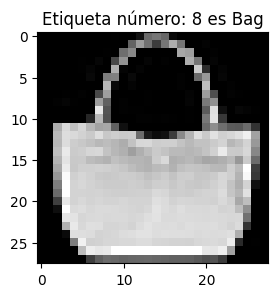

In [ ]:
plt.figure(figsize=(3, 3))  # figura pequeña
plt.imshow(image, cmap=plt.cm.gray)  # dibuja en grises
plt.title(f'Etiqueta número: {label} es {class_names[label]}') # título con número y nombre de prenda
plt.show()# muestra la foto

In [ ]:
print(train_images.shape)  # (60000, 28, 28)  imágenes de entrenamiento
print(test_images.shape)   # (10000, 28, 28)  imágenes de prueba

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Normalizar las imágenes para que los valores estén en el rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),# 32 filtros 3×3, entrada 28×28×1
    MaxPooling2D((2, 2)), # reduce a mitad cada dimensión
    Conv2D(64, (3, 3), activation='relu'), # 64 filtros 3×3
    MaxPooling2D((2, 2)),   # otra reducción 2×2
    Conv2D(64, (3, 3), activation='relu'),  # 64 filtros más
    Flatten(),  # aplana todo en un vector
    Dense(64, activation='relu'), # capa densa de 64 neuronas
    Dense(10)   # salida: 10 neuronas (una por clase)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Tasa de aprendizaje deseada
learning_rate = 0.001 # tamaño de paso para cada actualización de pesos
adam_optimizer = Adam(learning_rate)  # optimizador con la tasa elegida

In [ ]:
model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),  # compara etiqueta entera con logits sin softmax
              metrics=['accuracy']) # muestra % de aciertos

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7400 - loss: 0.7015 - val_accuracy: 0.8650 - val_loss: 0.3782
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8787 - loss: 0.3308 - val_accuracy: 0.8886 - val_loss: 0.3156
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9002 - loss: 0.2770 - val_accuracy: 0.8899 - val_loss: 0.3078
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9105 - loss: 0.2431 - val_accuracy: 0.9029 - val_loss: 0.2676
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9193 - loss: 0.2181 - val_accuracy: 0.9026 - val_loss: 0.2708
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9266 - loss: 0.1987 - val_accuracy: 0.9066 - val_loss: 0.2756
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9334 - loss: 0.1763 - val_accuracy: 0.9068 - val_loss: 0.2698
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9406 - loss: 0.1598 -

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))  # entrena 10 pasadasepocas de todas las imágenes, validando con la prueba cada época

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9540 - loss: 0.1205 - val_accuracy: 0.9113 - val_loss: 0.2935
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9578 - loss: 0.1127 - val_accuracy: 0.9081 - val_loss: 0.3255
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9634 - loss: 0.0964 - val_accuracy: 0.9130 - val_loss: 0.3154
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9654 - loss: 0.0917 - val_accuracy: 0.9010 - val_loss: 0.3429
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9668 - loss: 0.0864 - val_accuracy: 0.9053 - val_loss: 0.3482
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9720 - loss: 0.0744 - val_accuracy: 0.9112 - val_loss: 0.3640
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9719 - loss: 0.0728 - val_accuracy: 0.9059 - val_loss: 0.3889
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9746 - loss: 0.0673 - 

In [ ]:
#Evalua modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)  # calcula pérdida y precisión sobre el conjunto de prueba; verbose=2 muestra el resultado breve

313/313 - 1s - 2ms/step - accuracy: 0.9087 - loss: 0.4225


In [ ]:
probability_model = Sequential([model, Softmax()])  # envuelve red con Softmax para obtener probabilidades
predictions = probability_model.predict(test_images)  # predice probabilidades para cada imagen de prueba
predicted_labels = np.argmax(predictions, axis=1) # determina clase más probable (0-9) por imagen

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
#Calcula matriz de confución
cm = confusion_matrix(test_labels, predicted_labels)  # compara etiquetas reales vs predichas; devuelve matriz 10×10
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)  # objeto listo para graficar con nombres de prendas

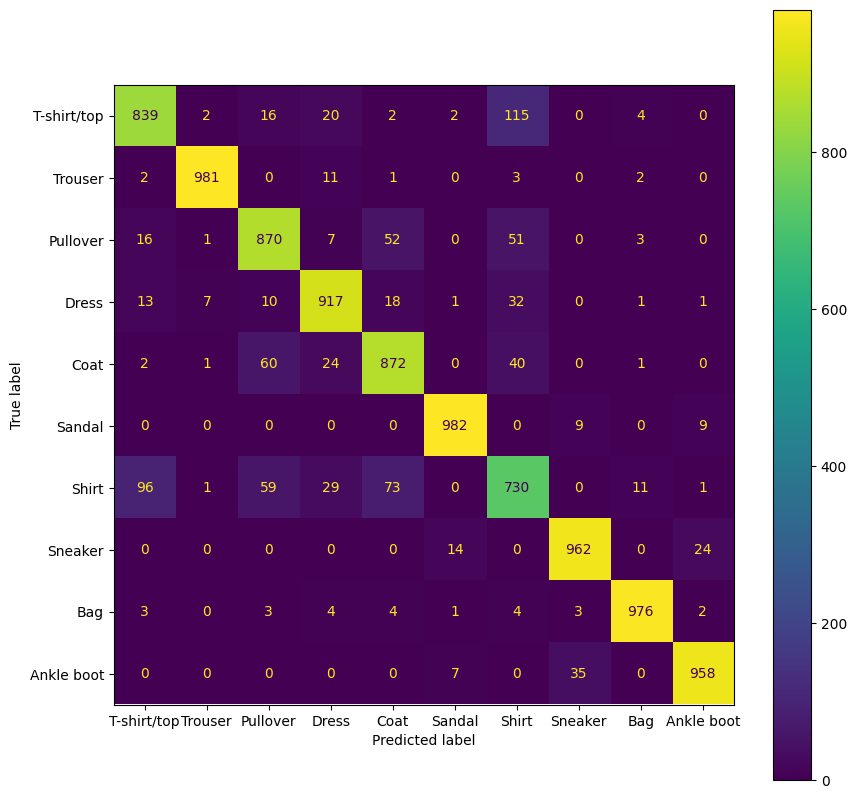

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))  # crea figura y ejes de 10×10 pulgadas
disp.plot(ax=ax) # dibuja la matriz de confusión sobre esos ejes
plt.show() # muestra gráfico

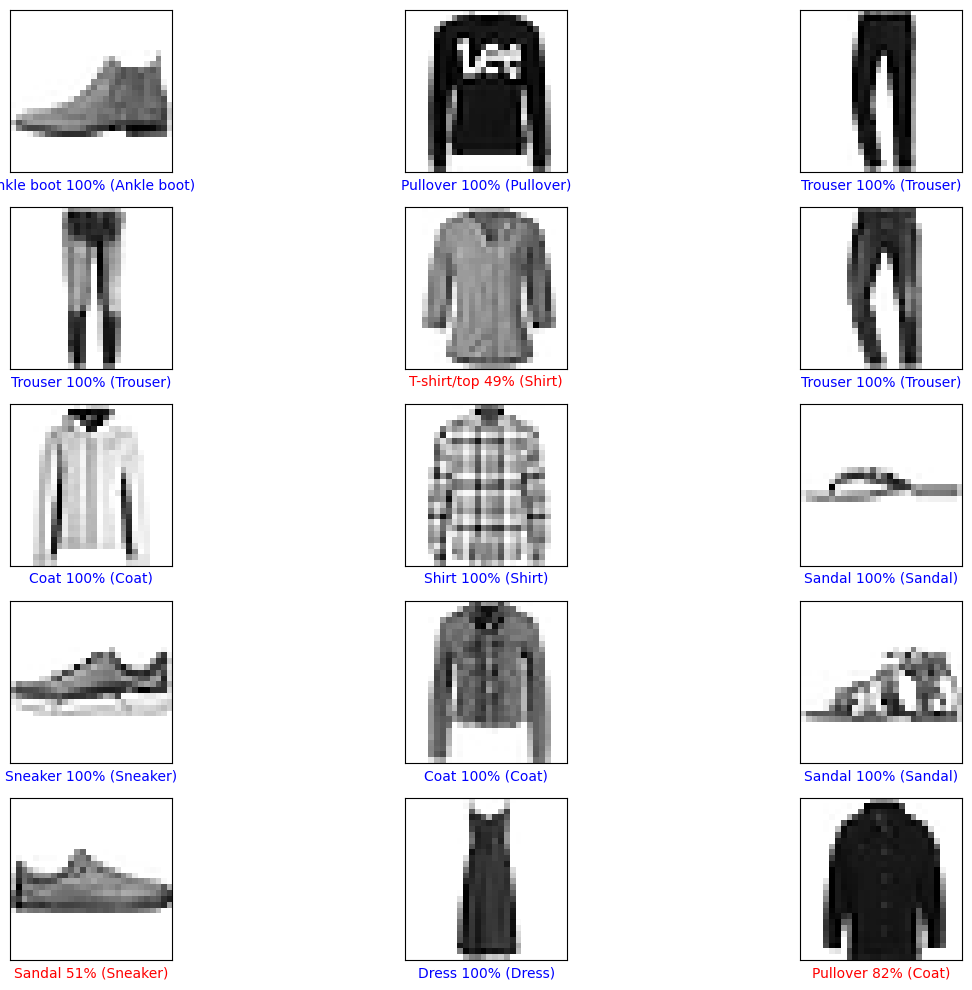

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i] # toma la etiqueta y la imagen número i
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)  # dibuja la imagen 28×28

    predicted_label = tf.argmax(predictions_array).numpy() # clase predicha
    color = 'blue' if predicted_label == true_label else 'red'  # azul si acierta, rojo si falla

    # etiqueta con nombre, % de confianza y nombre real
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
                                         color=color)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)      # espacio para la foto
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()